# Problem Statement

## A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:


## 1.)Check eligibility of the Customer given the inputs described above.(Classification)
## 2.)If customer is not eligible for the input required amount and duration:
###  -->what can be amount for the given duration.(Regression)



# 1.)Check eligibility of the Customer given the inputs described above.(Classification)
### Here We need to find the eligilble or non eligilble peoples in TESTING file,
### So for that we have loan status columns in our Training dataset.

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
A = pd.read_csv('training_set.csv')

In [3]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


## In this We need to create a function for to check the feature|column is categorical and continous.

In [4]:
cat = []
con = []
for i in A.columns:
    if A[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)


## NOw making a function which replaced the values in the columns.
## If the columns are continous so there it replace with the mean and 
## If the columns are categorical so there it replace with the mode.

In [5]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(), columns = ['mv'])
    R = Q[Q.mv > 0]
    for i in R.index:
        if df[i].dtypes == 'object':
            mode = df[i].mode()[0]
            df[i] = df[i].fillna(mode)
        else:
            mean = df[i].mean()
            df[i] = df[i].fillna(mean)

## Now inspection of missing data is very important steps to clean that data.

In [6]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Here we are using our previously created  Function replacer to replace the missing data

In [7]:
replacer(A)

In [8]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

In [9]:
def Univariate(A, figsize,rows,columns):
    import seaborn as sns
    import matplotlib.pyplot as plt
    x = 1
    plt.figure(figsize=figsize)
    for i in A.columns:
        if A[i].dtypes == 'object':
            plt.subplot(rows,columns,x)
            sns.countplot(A[i])
            x = x + 1
        else:
            plt.subplot(rows,columns,x)
            sns.distplot(A[i])
            x = x+1

In [10]:
def Bivariate(A, Y,figsize,rows,columns):
    import seaborn as sns
    import matplotlib.pyplot as plt
    x = 1
    plt.figure(figsize=figsize)
    for i in A.columns:
        if A[i].dtypes == 'object':
            plt.subplot(rows,columns,x)
            sns.boxplot(A[i],A[Y])
            x = x + 1
        else:
            plt.subplot(rows,columns,x)
            sns.scatterplot(A[i],A[Y])
            x = x+1

In [12]:
A.shape

(614, 13)

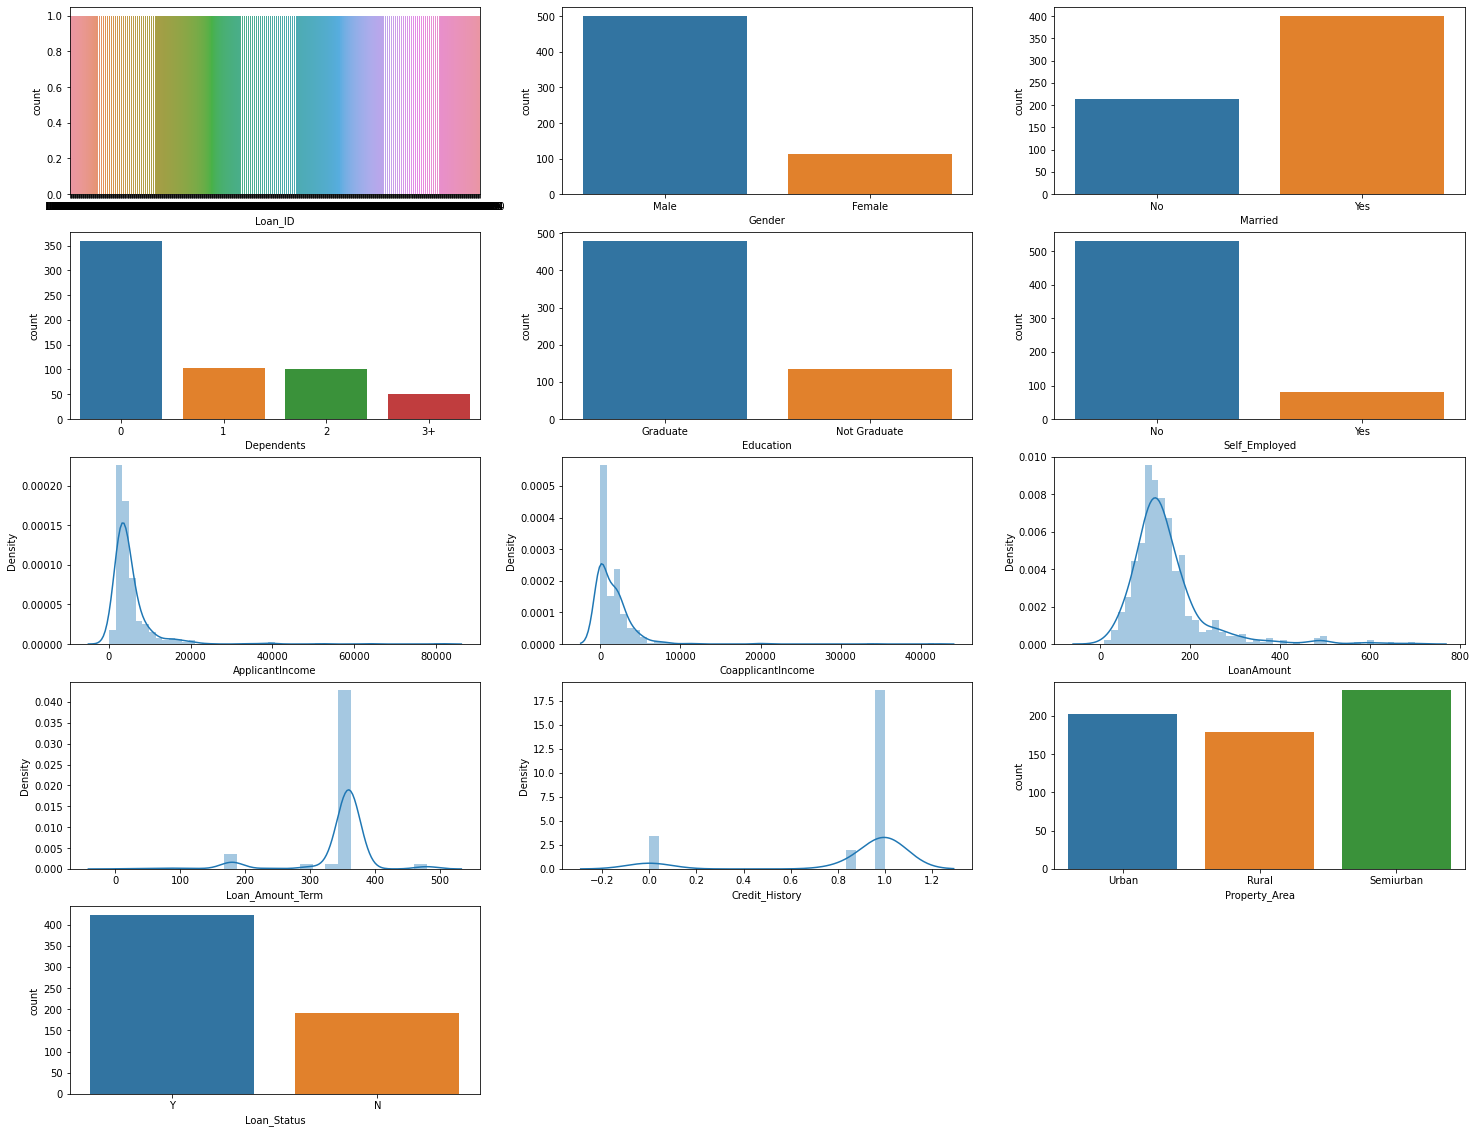

In [13]:
Univariate(A, (25,20),5,3)

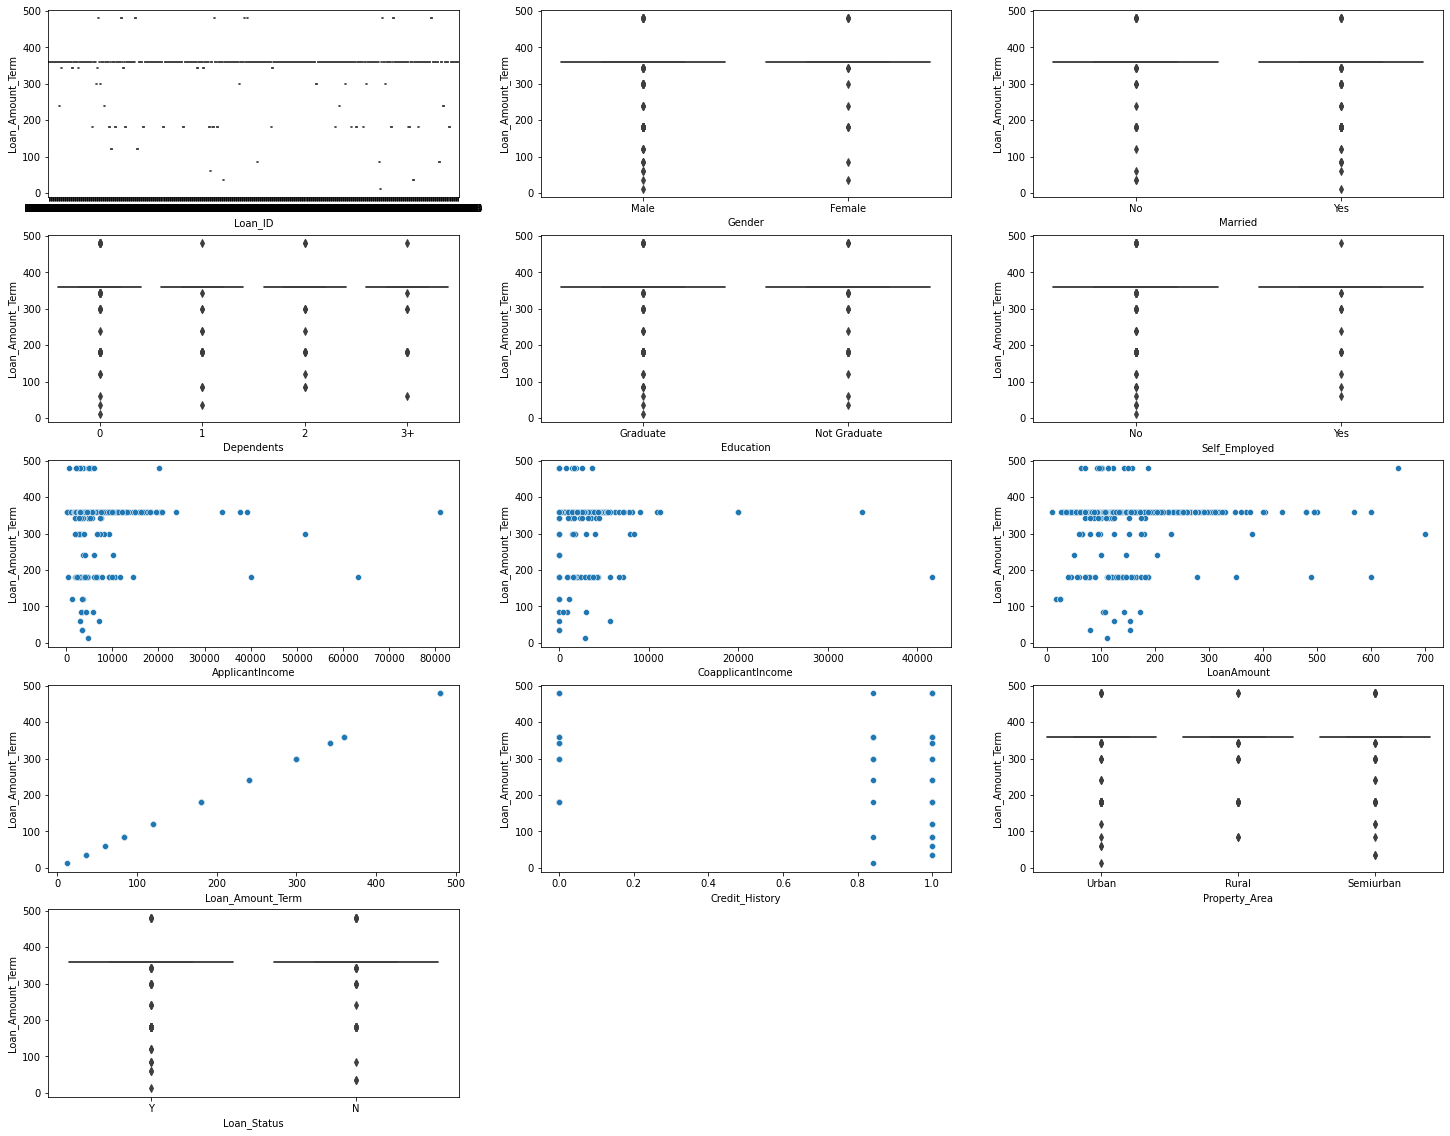

In [18]:
Bivariate(A,'Loan_Amount_Term', (25,20), 5,3)

## Defining Our Goal for prediction.
## X is our predictors.
## Y is Predicted Columns Loan Status

In [9]:
X = A.drop(['Loan_ID','Loan_Status'],axis = 1)

In [10]:
Y = A[['Loan_Status']]

## Preprocessing --> Minmax Scaler Is used to standardized the values in the data. 
##  Also We are doing here One Hot Encoding to the data.
## At the end we will join the our continous preprocessed data and categorical One Hot Encoding data.

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
cat = []
con = []
for i in X.columns:
    if X[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)

In [13]:
mm = MinMaxScaler()
Xcon = pd.DataFrame(mm.fit_transform(X[con]), columns = X[con].columns)
Xcat = pd.get_dummies(X[cat])

In [14]:
X1 = Xcon.join(Xcat)

In [15]:
X1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,0.198860,0.743590,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.065004,0.036192,0.172214,0.743590,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0.035250,0.000000,0.082489,0.743590,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0.030093,0.056592,0.160637,0.743590,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.072356,0.000000,0.191027,0.743590,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,0.089725,0.743590,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,0.048930,0.000000,0.044863,0.358974,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,0.097984,0.005760,0.353111,0.743590,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,0.091936,0.000000,0.257598,0.743590,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


## KNN K Nearest Neighbors 
## We will see the accuracy of different Algorithms.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
model = knc.fit(X1, Y)

### Grid Search Cv --> It is used for finding any best parameters to also get the best accuracy. For that tuning parameter is helpful to reach our best params values.

In [17]:
tp = {'n_neighbors':range(1,40,1)}

In [18]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV( knc, tp,scoring = 'accuracy', cv = 4)
gcv = cv.fit(X1,Y)
gcv.best_params_

{'n_neighbors': 22}

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=22)
model = knc.fit(X1,Y)

## From here to get the best accuracy we will call that metrics. So it gives u the best accuracy when u pass the ur X variables(data).

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
pred = model.predict(X1)

In [21]:
accuracy_score(Y, pred)

0.750814332247557

## Decision Tree with pruned parameter

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21, max_depth=1)
#dtc = DecisionTreeClassifier(random_state=21, min_samples_split=2)
#dtc = DecisionTreeClassifier(random_state=21, min_samples_leaf=1)

model=dtc.fit(X1,Y)
predtr= model.predict(X1)
print('train-Acc', accuracy_score(Y, predtr))

train-Acc 0.8094462540716613


In [23]:
tp = {'max_depth':range(1,40,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV( dtc, tp,scoring = 'accuracy', cv = 4)
gcv = cv.fit(X1,Y)
gcv.best_params_

{'max_depth': 1}

## Ada Boost : It used with the Decision Tree max depth 2 and no. of tree n_estimator which we need to pass as a parameter.

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21, max_depth=2)
#abc = AdaBoostClassifier(dtc, random_state=21,n_estimators=20)
abc = AdaBoostClassifier(dtc, random_state=21,n_estimators=1)

model=abc.fit(X1,Y)
predtr= model.predict(X1)
print('train-Acc', accuracy_score(Y, predtr))

train-Acc 0.8159609120521173


In [25]:
tp = {'n_estimators':range(1,40,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV( abc, tp,scoring = 'accuracy', cv = 4)
gcv = cv.fit(X1,Y)
gcv.best_params_

{'n_estimators': 1}

## Random Forest With parameter maxdepth and n_estimators

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=21)
tp = {'max_depth':range(1,40,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV( rfc, tp,scoring = 'accuracy', cv = 4)
gcv = cv.fit(X1,Y)
gcv.best_params_

{'max_depth': 3}

## Here i Got the different Accuracy from Different Algorithms or Technique.
## Now The conclusion is I am going to use Random Forest for Classification
## Random Forest Classification

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=21, max_depth = 3)

model=rfc.fit(X1,Y)
predtr= model.predict(X1)
print('train-Acc', accuracy_score(Y, predtr))

train-Acc 0.8127035830618893


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, predtr)

array([[ 83, 109],
       [  6, 416]], dtype=int64)

# Testing
## So previous line of code we have seen Training Data and Create a model for testing by using Training data.
## Means while training the data our model is trained to predict next testing set.
## At that time i am going to test my model by using testing set.

In [29]:
B = pd.read_csv('testing_set.csv')
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [30]:
xtest = B.drop('Loan_ID', axis = 1)

## In this We need to create a function for to check the feature|column is categorical and continous.
## Now inspection of missing data is very important steps to clean that data.
## Preprocessing of Test Data
## Here we are using our previously created Function replacer to replace the missing data.


In [31]:
replacer(xtest)

In [32]:
cat = []
con = []
for i in xtest.columns:
    if xtest[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
Xcon = pd.DataFrame(mm.fit_transform(xtest[con]), columns = xtest[con].columns)
Xcat = pd.get_dummies(xtest[cat])
xtest = Xcon.join(Xcat)

In [33]:
xtest

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.078865,0.000000,0.157088,0.746835,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,0.042411,0.062500,0.187739,0.746835,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0.068938,0.075000,0.344828,0.746835,1.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,0.032263,0.106083,0.137931,0.746835,0.825444,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,0.045168,0.000000,0.095785,0.746835,1.000000,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.055274,0.074042,0.162835,0.746835,1.000000,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,0.057329,0.029542,0.166667,0.746835,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,0.044810,0.083042,0.187739,0.746835,0.825444,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,0.068938,0.099708,0.249042,0.746835,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


## That is the Testing Prediction which results as who is eligible for loan.

In [34]:
model.predict(xtest)

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

## We are creating a new column for the Predicted loan Status in testing data set.

In [35]:
B['Predict_Loan']= model.predict(xtest)

In [36]:
B

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predict_Loan
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


### In this We need to create a function for to check the feature|column is categorical and continous.
### Now inspection of missing data is very important steps to clean that data.
### Preprocessing of Test Data
### Here we are using our previously created Function replacer to replace the missing data.

In [37]:
replacer(A)

In [38]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Problem Statment: 2.)If customer is not eligible for the input required amount and duration:
    a.)what can be amount for the given duration.(Regression)
     Predict Loan Amount for Rejected ones


## For this problem statement we are taking Train_set and Test Set data which is predicted and actually Yes

In [39]:
A1 = A[A.Loan_Status == "Y"]

In [40]:
A2 = B[B.Predict_Loan == 'Y']

In [41]:
A1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [42]:
A2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Predict_Loan'],
      dtype='object')

## WE are evaluating the column names are same and also change into the real names. So here we have Predicted_loan_Status column will change it into Loan_Status

In [43]:
A2.columns = A1.columns

## if i want merge to dataset so we will use concat.

In [44]:
C = pd.concat([A1,A2])

## We are doing reindexing because if we didnot do the reindexing then of the imbalanced indexing it will give u error

In [45]:
C.index

Int64Index([  0,   2,   3,   4,   5,   6,   8,  10,  11,  12,
            ...
            357, 358, 359, 360, 361, 362, 363, 364, 365, 366],
           dtype='int64', length=730)

In [46]:
C.shape

(730, 13)

In [47]:
C.index = range(0,730,1)

In [48]:
C.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.000000,360.0,1.0,Urban,Y


In [49]:
replacer(C)

In [50]:
C.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Defining Our Goal for prediction.
## XC is our predictors.
## YC is Predicted Columns Loan Amount.

## We are taking who are eligible for Loan_Status(Y).Only that training and testing data will use for prediction of loan amount.

In [51]:
XC = C.drop(labels = ['LoanAmount', 'Loan_ID'], axis = 1)
YC = C[['LoanAmount']]

## Preprocessing

In [52]:
cat = []
con = []
for i in XC.columns:
    if XC[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
Xcon = pd.DataFrame(mm.fit_transform(XC[con]), columns = XC[con].columns)
Xcat = pd.get_dummies(XC[cat])
XC = Xcon.join(Xcat)

# Random Forest Regressor for checking 

In [53]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=21)
tp = {'max_depth':range(1,40,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV( rfr, tp,scoring = 'neg_mean_squared_error', cv = 4)
gcv = cv.fit(XC, YC)
gcv.best_params_

{'max_depth': 6}

In [54]:
tp = {'random_state':range(1,40,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV( rfr, tp,scoring = 'neg_mean_squared_error', cv = 4)
gcv = cv.fit(XC, YC)
gcv.best_params_

{'random_state': 16}

In [55]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=21, max_depth = 6 )
model=rfr.fit(XC, YC)
predtr= model.predict(XC)

from sklearn.metrics import mean_squared_error
print('train-Error', round(mean_squared_error(YC, predtr),2))

train-Error 1414.62


# Decision Tree Regressor 

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
dtr = DecisionTreeRegressor(random_state=21, max_depth=2)
abr = AdaBoostRegressor(dtr)
tp = {'n_estimators':range(1,40,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV( abr, tp,scoring = 'neg_mean_squared_error', cv = 4)
gcv = cv.fit(XC, YC)
gcv.best_params_

{'n_estimators': 21}

In [57]:
tp = {"random_state": range(1,40,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV( abr, tp,scoring = 'neg_mean_squared_error', cv = 4)
gcv = cv.fit(XC, YC)
gcv.best_params_

{'random_state': 22}

In [58]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
dtr = DecisionTreeRegressor(random_state=21, max_depth=2)
abr = AdaBoostRegressor(random_state=22,n_estimators=29)
model=abr.fit(XC,YC)
predtr= model.predict(XC)
from sklearn.metrics import mean_squared_error
print('train-Error', round(mean_squared_error(YC, predtr),2))

train-Error 2162.52


# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model=lr.fit(XC,YC)
predtr= model.predict(XC)
from sklearn.metrics import mean_squared_error
print('train-Error', round(mean_squared_error(YC, predtr),2))

train-Error 3412.1


# Knn--> K Nearest Neighbors

In [60]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
tp = {'n_neighbors':range(1,40,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV( knr, tp,scoring = 'neg_mean_squared_error', cv = 4)
gcv = cv.fit(XC,YC)
gcv.best_params_

{'n_neighbors': 39}

In [61]:

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=39)
model=knr.fit(XC,YC)
predtr= model.predict(XC)
from sklearn.metrics import mean_squared_error
print('train-Error', round(mean_squared_error(YC, predtr),2))

train-Error 4836.2


## Testing Data Preprocessing 
## First need to find which data we have to predict 
## Second we are going to call the data where loanstatus is NO in testing set

In [62]:
B1 = B[B.Predict_Loan == 'N']
replacer(B1)

In [63]:
B1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Predict_Loan         0
dtype: int64

## Defining Our Goal for prediction.
## XNew is our predictors.
## We are taking who are Not eligible for Loan_Status(N).Only from testing data will use for prediction of loan amount.

In [64]:
XNew = B1.drop(['Loan_ID', 'LoanAmount'], axis= 1)

In [65]:
XNew.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Predict_Loan'],
      dtype='object')

In [66]:
X = A.drop(['Loan_ID', 'LoanAmount'],axis = 1)

## We are checking the column items

In [67]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Now we need to equalize the column name.

In [68]:
XNew.columns = X.columns

In [69]:
XNew.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## We need to check indexing is good or not

In [70]:
XNew.index

Int64Index([  7,  13,  25,  35,  55,  58,  63,  66,  67,  69,  80,  82,  84,
             94, 101, 106, 117, 118, 119, 123, 124, 126, 140, 142, 147, 153,
            161, 165, 166, 168, 173, 174, 192, 193, 196, 198, 211, 224, 229,
            235, 236, 241, 243, 245, 250, 255, 266, 268, 273, 274, 278, 293,
            301, 311, 317, 325, 339, 346, 354],
           dtype='int64')

In [71]:
XNew.shape

(59, 11)

## When we saw our index is wrong so i need reindex the data.
## if i wont do reindex so it will give u error

In [72]:
XNew.index = range(0,59,1)


In [73]:
replacer(XNew)

## Again the replacer function is using and catcon function is using

In [74]:
cat = []
con = []
for i in XNew.columns:
    if XNew[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)
#from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
Xcon = pd.DataFrame(mm.fit_transform(XNew[con]), columns = XNew[con].columns)
Xcat = pd.get_dummies(XNew[cat])
XNew = Xcon.join(Xcat)

## After done preprocessing i will check the previous data and preprocessed data have same no. of columns or nor

In [75]:
Xpred = XNew

## By using this data we will predict the Loan Amount

In [76]:
Xpred.columns


Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_N'],
      dtype='object')

In [77]:
XC.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [78]:
Xpred.columns = XC.columns

In [79]:
Xpred

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.31048,0.000000,0.746835,0.0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1
1,0.97384,0.000000,0.746835,0.0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1
2,0.00000,1.000000,0.746835,0.0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1
3,0.25200,0.000000,0.746835,0.0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1
4,0.22000,0.000000,0.746835,0.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,1
5,0.22232,0.152667,0.746835,0.0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1
6,0.16808,0.062500,0.746835,0.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
7,0.37600,0.000000,0.746835,0.0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,1
8,0.27560,0.000000,0.746835,0.0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,1
9,0.19664,0.212708,0.746835,0.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1


# LoanAmount Predictions

In [80]:
pred = model.predict(Xpred)

In [81]:
pred

array([[132.44030386],
       [196.30769231],
       [140.13877339],
       [134.61538462],
       [116.93364518],
       [156.51282051],
       [128.49774775],
       [138.58358175],
       [137.51282051],
       [140.02564103],
       [215.00440642],
       [133.33773976],
       [135.90800416],
       [184.37845355],
       [156.60031185],
       [118.08749134],
       [170.09640227],
       [114.48717949],
       [153.23076923],
       [139.49774775],
       [120.6515939 ],
       [141.83108108],
       [145.98492723],
       [153.1025641 ],
       [141.63486381],
       [143.72235514],
       [134.61538462],
       [111.97435897],
       [121.82051282],
       [152.47210672],
       [118.13877339],
       [143.51722694],
       [137.47651315],
       [146.60471828],
       [189.35281252],
       [147.46153846],
       [151.29261954],
       [141.90800416],
       [145.84615385],
       [118.08749134],
       [128.33333333],
       [146.26697852],
       [140.02564103],
       [146

## Defining Our Goal for prediction.
## XC is our predictors.
## YC is Predicted Columns Loan Amount.
## We are taking who are eligible for Loan_Status(Y).Only that training and testing data will use for prediction of loan amount.

In [82]:
XC = C.drop(labels = ['Loan_Amount_Term', 'Loan_ID'], axis = 1)
YC = C[['Loan_Amount_Term']]

## Preprocessing

In [83]:
cat = []
con = []
for i in XC.columns:
    if XC[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
Xcon = pd.DataFrame(mm.fit_transform(XC[con]), columns = XC[con].columns)
Xcat = pd.get_dummies(XC[cat])
XC = Xcon.join(Xcat)

## Random Forest Regressor for checking

In [84]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(XC,YC,test_size=0.2, random_state=40)

In [85]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=21, max_depth = 8 )
model=rfr.fit(xtrain, ytrain)
predtr= model.predict(xtrain)
predts= model.predict(xtest)

from sklearn.metrics import mean_squared_error
print('train-Error', round(mean_squared_error(ytrain, predtr),2))
print('test-Error', round(mean_squared_error(ytest, predts),2))

train-Error 1862.5
test-Error 3877.15


In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
dtr = DecisionTreeRegressor(random_state=21, max_depth=2)
abr = AdaBoostRegressor(random_state=21)
tp = {'n_estimators':range(1,40,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV( abr, tp,scoring = 'neg_mean_squared_error', cv = 4)
gcv = cv.fit(xtrain, ytrain)
gcv.best_params_

{'n_estimators': 4}

## Decision Tree Regressor

In [87]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
dtr = DecisionTreeRegressor(random_state=21, max_depth=2)
abr = AdaBoostRegressor(random_state=21,n_estimators=22)
model=abr.fit(xtrain, ytrain)
predtr= model.predict(xtrain)
predts= model.predict(xtest)

from sklearn.metrics import mean_squared_error
print('train-Error', round(mean_squared_error(ytrain, predtr),2))
print('test-Error', round(mean_squared_error(ytest, predts),2))

train-Error 5823.55
test-Error 7234.9


## Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model=lr.fit(xtrain, ytrain)
predtr= model.predict(xtrain)
predts= model.predict(xtest)

from sklearn.metrics import mean_squared_error
print('train-Error', round(mean_squared_error(ytrain, predtr),2))
print('test-Error', round(mean_squared_error(ytest, predts),2))

train-Error 3895.73
test-Error 3412.85


## Knn--> K Nearest Neighbors

In [89]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
tp = {'n_neighbors':range(1,40,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV( knr, tp,scoring = 'neg_mean_squared_error', cv = 4)
gcv = cv.fit(xtrain, ytrain)
gcv.best_params_

{'n_neighbors': 36}

In [90]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=15)
model=knr.fit(xtrain, ytrain)
predtr= model.predict(xtrain)
predts= model.predict(xtest)

from sklearn.metrics import mean_squared_error
print('train-Error', round(mean_squared_error(ytrain, predtr),2))
print('test-Error', round(mean_squared_error(ytest, predts),2))

train-Error 3742.74
test-Error 3552.55


## Testing Data Preprocessing
## First need to find which data we have to predict
## Second we are going to call the data where loanstatus is NO in testing set

In [91]:
B1 = B[B.Predict_Loan == 'N']
replacer(B1)

In [92]:
B1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Predict_Loan         0
dtype: int64

## Defining Our Goal for prediction.
## XNew is our predictors.
## We are taking who are Not eligible for Loan_Status(N).Only from testing data will use for prediction of loan amount.

In [93]:
XNew = B1.drop(['Loan_ID', 'Loan_Amount_Term'], axis= 1)

In [94]:
XNew.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area', 'Predict_Loan'],
      dtype='object')

In [95]:
X = A.drop(['Loan_ID', 'Loan_Amount_Term'],axis = 1)

## We are checking the column items

In [96]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

## Now we need to equalize the column name.

In [97]:
XNew.columns = X.columns

In [98]:
XNew.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

## We need to check indexing is good or not

In [99]:
XNew.index

Int64Index([  7,  13,  25,  35,  55,  58,  63,  66,  67,  69,  80,  82,  84,
             94, 101, 106, 117, 118, 119, 123, 124, 126, 140, 142, 147, 153,
            161, 165, 166, 168, 173, 174, 192, 193, 196, 198, 211, 224, 229,
            235, 236, 241, 243, 245, 250, 255, 266, 268, 273, 274, 278, 293,
            301, 311, 317, 325, 339, 346, 354],
           dtype='int64')

In [100]:
XNew.shape

(59, 11)

## When we saw our index is wrong so i need reindex the data.
## if i wont do reindex so it will give u error

In [101]:
XNew.index = range(0,59,1)


In [102]:
replacer(XNew)

## Again the replacer function is using and catcon function is using

In [103]:
cat = []
con = []
for i in XNew.columns:
    if XNew[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)
#from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
Xcon = pd.DataFrame(mm.fit_transform(XNew[con]), columns = XNew[con].columns)
Xcat = pd.get_dummies(XNew[cat])
XNew = Xcon.join(Xcat)

## Again the replacer function is using and catcon function is using

In [104]:
Xpred = XNew

## By using this data we will predict the Loan Amount Term

In [105]:
Xpred.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status_N'],
      dtype='object')

In [106]:
XC.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [107]:
Xpred.columns = XC.columns

In [108]:
Xpred

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.31048,0.000000,0.390438,0.0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1
1,0.97384,0.000000,0.466135,0.0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1
2,0.00000,1.000000,0.394422,0.0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1
3,0.25200,0.000000,0.505976,0.0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1
4,0.22000,0.000000,0.322709,0.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,1
5,0.22232,0.152667,0.505976,0.0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1
6,0.16808,0.062500,0.235060,0.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
7,0.37600,0.000000,0.342629,0.0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,1
8,0.27560,0.000000,0.322709,0.0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,1
9,0.19664,0.212708,0.553785,0.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1


## LoanAmountTerm Predictions

In [109]:
pred = model.predict(Xpred)

In [110]:
pred

array([[344.        ],
       [344.        ],
       [360.        ],
       [360.        ],
       [358.74114943],
       [332.        ],
       [368.        ],
       [334.4       ],
       [358.8       ],
       [324.        ],
       [342.74114943],
       [344.        ],
       [358.8       ],
       [356.        ],
       [348.        ],
       [346.74114943],
       [328.        ],
       [338.8       ],
       [336.        ],
       [360.        ],
       [338.8       ],
       [329.6       ],
       [360.        ],
       [310.74114943],
       [342.8       ],
       [332.        ],
       [356.        ],
       [344.        ],
       [340.        ],
       [324.        ],
       [326.74114943],
       [346.74114943],
       [344.        ],
       [336.        ],
       [356.        ],
       [348.        ],
       [360.        ],
       [360.        ],
       [310.74114943],
       [326.74114943],
       [348.        ],
       [358.8       ],
       [335.33333333],
       [358